In [125]:
import numpy as np 
import matplotlib.pyplot as plt 
import cv2

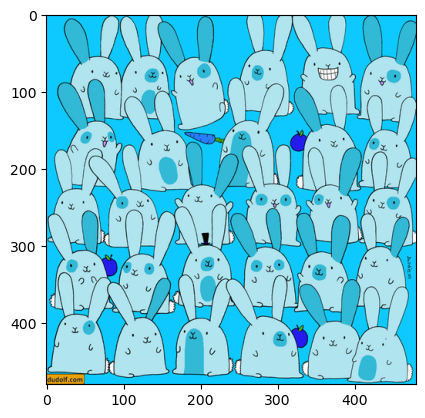

In [126]:
image = cv2.imread(r"C:\Users\ASUS\Desktop\UET\Image Processing\Finding-Counting-ImageSet\Counting\rabbit2.png")
plt.imshow(image)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

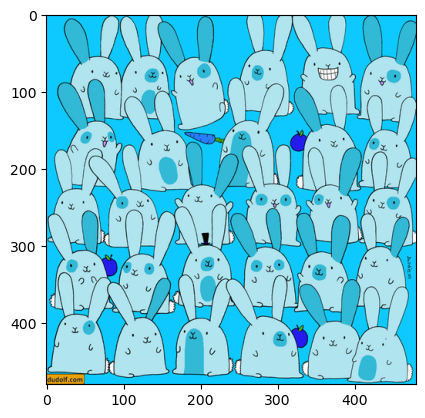

In [127]:
output_image = image.copy()
plt.imshow(output_image)

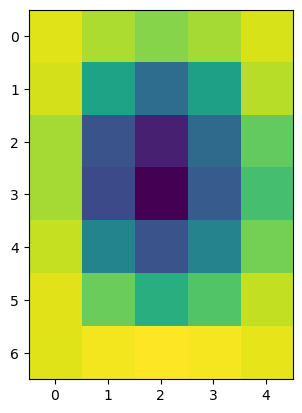

In [128]:
template = cv2.imread(r'C:\Users\ASUS\Desktop\UET\Image Processing\Finding-Counting-ImageSet\Counting\rabbit2\eye.png', 0)
plt.imshow(template)

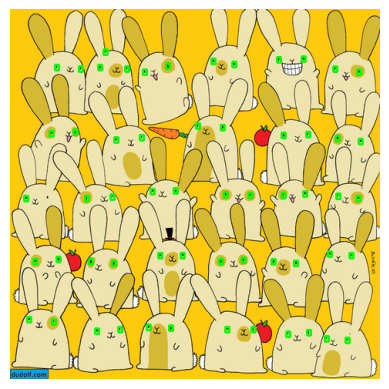

In [129]:
threshold = 0.68

w, h = template.shape[::-1]

result = cv2.matchTemplate(gray_image, template, cv2.TM_CCOEFF_NORMED)
loc = np.where(result >= threshold)

rectangles = []
for pt in zip(*loc[::-1]):
    rectangles.append([int(pt[0]), int(pt[1]), int(w), int(h)])

rectangles, _ = cv2.groupRectangles(rectangles, groupThreshold=1, eps=0.5)

for (x, y, w, h) in rectangles:
    cv2.rectangle(output_image, (x, y), (x + w, y + h), (0, 255, 0), 2)

plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [130]:
cntnum_rectangles = len(rectangles)
cntnum_rectangles

58

In [ ]:
rabbit_num = int(cntnum_rectangles / 2)